# Heart Disease progression classification

Used dataset: https://www.kaggle.com/datasets/muneer228/uci-chd-ml-dataset

A. Janosi, W. Steinbrunn, M. Pfisterer, and R. Detrano. "Heart Disease," UCI Machine Learning Repository, 1989. [Online]. Available: https://doi.org/10.24432/C52P4X.



Used methods: 

1. Random forest with PCA and One-hot encoding
2. Random forest without PCA and without One-hot encoding
3. Dence Neural Network

## Preparation

In [477]:
import numpy as np
import pandas as pd 
import os

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [478]:
names = [ 'age', 'sex' , 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df_raw = pd.read_csv("/kaggle/input/uci-chd-ml-dataset/processed.cleveland.data", header=None)\
    .set_axis(names, axis=1)\
    .astype(np.float64, errors='ignore')\
    .dropna()

In [479]:
for col in df_raw.columns:
    df_raw[col] = pd.to_numeric(df_raw[col], errors="coerce")
df_raw = df_raw.dropna()

In [480]:
one_hot_needed =  ['cp', 'restecg', 'slope', 'ca', 'thal', 'num']

In [481]:
df_raw.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


## Random Forest (with one-hot) and PCA

In [482]:
df = pd.DataFrame()
df = pd.get_dummies(df_raw, columns=one_hot_needed)

In [483]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1.0,cp_2.0,...,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0,num_0.0,num_1.0,num_2.0,num_3.0,num_4.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,True,False,...,False,False,False,True,False,True,False,False,False,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,False,False,...,False,True,True,False,False,False,False,True,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,False,False,...,True,False,False,False,True,False,True,False,False,False
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,False,False,...,False,False,True,False,False,True,False,False,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,False,True,...,False,False,True,False,False,True,False,False,False,False


State of disease - "num" column

In [484]:
x = df.drop(columns=['num_0.0','num_1.0','num_2.0','num_3.0','num_4.0'])
y = df[['num_0.0','num_1.0','num_2.0','num_3.0','num_4.0']]

In [485]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=77)

### PCA

In [486]:
from sklearn.decomposition import PCA

PCA_N_COMPONENTS = 13
pca = PCA(n_components = PCA_N_COMPONENTS)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [487]:
# HYPERPARAMETHERS

params_grid = {'n_estimators': (10, 50, 100, 250)}

### Train and test

In [488]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()
grid_search = GridSearchCV(model, params_grid).fit(x_train, y_train)

In [489]:
grid_search.best_params_,\
grid_search.best_score_

({'n_estimators': 100}, 0.387854609929078)

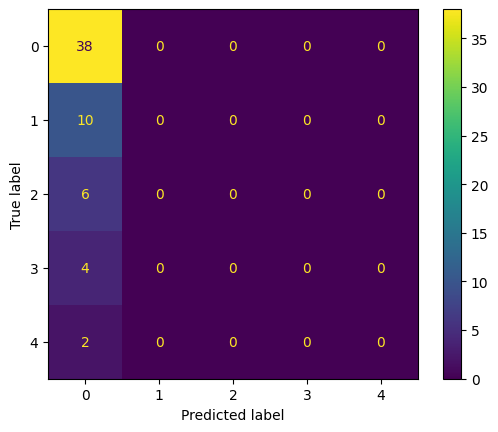

In [490]:
y_true = y_test.T.apply(lambda x: np.argmax(x)).sort_index()
y_pred = np.argmax(grid_search.best_estimator_.predict(x_test), axis=1)

ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred, labels=[0, 1, 2, 3, 4])).plot()

## Random Forest (WITHOUT one-hot)

In [491]:
from sklearn.model_selection import train_test_split

x_train, x_test , y_train, y_test = train_test_split(
    df_raw.drop(columns=["num"]),
    df_raw["num"],
    test_size=0.2,
    random_state=66
)

In [492]:
# HYPERPARAMETHERS

params_grid = {'n_estimators': (10, 50, 100, 250)}

In [493]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()
grid_search = GridSearchCV(model, params_grid).fit(x_train, y_train)

In [494]:
grid_search.best_params_,\
grid_search.best_score_

({'n_estimators': 100}, 0.5654255319148936)

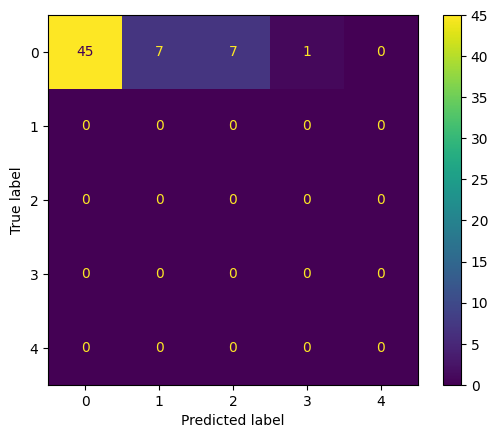

In [495]:
y_true = y_test.T.apply(lambda x: np.argmax(x)).sort_index()
y_pred = grid_search.best_estimator_.predict(x_test).astype(int)

ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred, labels=[0, 1, 2, 3, 4])).plot()

## Dense Network

In [496]:
x = df.drop(columns=['num_0.0','num_1.0','num_2.0','num_3.0','num_4.0'])
y = df[['num_0.0','num_1.0','num_2.0','num_3.0','num_4.0']]
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=88)

In [497]:
from tensorflow import keras as k

inputs = k.layers.Input(shape=(25,))
middle = k.layers.Dense(1024, activation="relu")(inputs)
middle = k.layers.Dense(256, activation="relu")(middle)
middle = k.layers.Dense(32, activation="relu")(middle)
outputs = k.layers.Dense(5, activation="softmax")(middle)

model = k.Model(inputs=inputs, outputs=outputs)

In [498]:
model.compile(loss=['categorical_focal_crossentropy'], metrics=['accuracy'])
model.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)          │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 1024)                │          26,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 297,413 (1.13 MB)

 Trainable params: 297,413 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

In [499]:
model.fit(x_train, y_train, validation_data =(x_test, y_test), epochs=15)

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.2080 - loss: 2.9853 - val_accuracy: 0.1833 - val_loss: 3.2908
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1815 - loss: 3.2983 - val_accuracy: 0.1833 - val_loss: 3.2908
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1566 - loss: 3.3984 - val_accuracy: 0.1833 - val_loss: 3.2908
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1777 - loss: 3.3136 - val_accuracy: 0.1833 - val_loss: 3.2908
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1813 - loss: 3.2988 - val_accuracy: 0.1833 - val_loss: 3.2908
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2096 - loss: 3.1849 - val_accuracy: 0.1833 - val_loss: 3.2908
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1958 - loss: 3.2405 - val_accuracy: 0.1833 - val_loss: 3.2908
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1878 - loss: 3.2729 - val_accuracy: 0.1833 - val_loss: 3.2908
Epoch 9

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


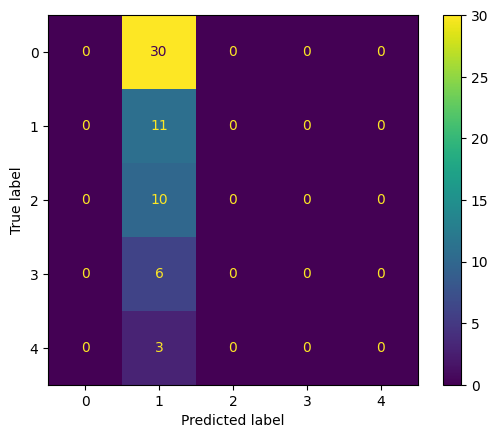

In [500]:
y_true = y_test.T.apply(lambda x: np.argmax(x)).sort_index()
y_pred = np.argmax(model.predict(x_test), axis=1)

ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred, labels=[0, 1, 2, 3, 4])).plot()

## Сonclusion

The most accurate method - Dense NN.